In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import re

In [4]:
!ls ./data/contract

'Alderson Loop'			 Genzeon      Scigon
 Aquinas			 HighBridge   SilverSearch
 Artech				 Interpros    SIS
'CE Solutions'			'Market St'  'Sullivan _ Cogliano'
 clean_df.pkl			 MDI	     'Synergy Business'
 df.pkl				 MDMS	      Techlink
 Dfuse				 MSC	     'Top Source'
 Diversant			 Nagarro      Transtech
 docs				 Nesco	     'VC5 Patners'
 Experis			 Neteffects  'Vega SSa'
'Fast Switch'			 Novius       Velossent
'FYI Solutions'			 Raedeer     'Whitridge Associates'
'Gardner Resources Consulting'	 raw_df.pkl
 GDH				 RCM


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [161]:
with open('./data/contract/raw_df.pkl','rb') as f:
    df_new=pickle.load(f)

In [192]:
df.head()

,batch_idx,paragrah_idx,content,doc,label
0,0,14,retainer term,../data/contract/docs/Microsoft Word - Novius ...,5
0,0,15,this agreement is made with consultant as an i...,../data/contract/docs/Microsoft Word - Novius ...,1
1,0,15,consultant agrees to be liable for all applic...,../data/contract/docs/Microsoft Word - Novius ...,1
2,0,15,novius hereby retains consultant and consulta...,../data/contract/docs/Microsoft Word - Novius ...,1
0,0,16,client assignment,../data/contract/docs/Microsoft Word - Novius ...,5


In [76]:
set(df['label'])

{'insurance',
 'other',
 'payment|pay|bill|billing',
 'remedy',
 'solicitation|solicit',
 'termination|terminate'}

In [181]:
df=df_new.copy()

In [164]:
# def add_space(s):
#     while re.search('[0-9]+(?=h|k|am)',s):
#         start,end=re.search('[0-9]+(?=h|k)',a).span()
#         s=s[:end]+' '+s[end:]
        
#     while re.search('[0-9]+(?=km|am)',s):
#         start,end=re.search('[0-9]+(?=h|k)',a).span()
#         s=s[:end-1]+' '+s[end-1:]
        
#     return s


In [190]:
diction={
    'other':5,
    'termination|terminate':0,
    'payment|pay|bill|billing':1,
    'insurance':2,
    'solicitation|solicit':3,
    'remedy':4
}

df['label']=[diction[x] for x in df['label']]
df['content']=[x.lower() for x in df['content']]
df['content']=[re.sub('[-/]',' ',x) for x in df['content']]
df['content']=[re.sub('[\,.;:▶]|\([\w\d]+\)','', x) for x in df['content']]
df['content']=[re.sub('[\(\)]','', x) for x in df['content']]
df['content']=[re.sub(' [b-zB-Z]{1} ','', x) for x in df['content']]
df['content']=[re.sub('u s','us', x) for x in df['content']]
df['content']=[re.sub('[\'\"\&\@\”\“]','', x) for x in df['content']]
df['content']=[re.sub('\n|\t|–','', x) for x in df['content']]
df['content']=[re.sub('\u2002','', x) for x in df['content']]
df['content']=[re.sub('\uf06f','', x) for x in df['content']]
# df['content']=[re.sub('$','$ ', x) for x in df['content']]
df['content']=[re.sub('(?<=\$)',' ', x) for x in df['content']]
# df['content']=[re.sub('([0-9]+)(?=h|k|km|am|)',' ', x) for x in df['content']]
df['content']=[re.sub('#_+','', x) for x in df['content']]
df['content']=[re.sub('([0-9]+)([a-z]+)',r'\1'+' '+r'\2', x) for x in df['content']]
df['content']=[re.sub('([a-z]+)([0-9]+)',r'\1'+' '+r'\2', x) for x in df['content']]
df['content']=[re.sub('(?=%)' ,' ', x) for x in df['content']]

In [186]:
a='123% abc'
a=re.sub('(?=%)',' ',a)
a

'123 % abc'

In [188]:
' '.join(df['content'])

'retainer term this agreement is made with consultant as an independent contractor and not as an employee of novius  consultant agrees to be liable for all applicable federal state local income taxes social security taxes disability health liability workmans compensation payments and or insurance required by  law  novius hereby retains consultant and consultant agrees to perform services for novius commencing the date set forth above and concluding in accordance with paragraphs 4 5 and 6 of the agreement client assignment retainer term this agreement is made with consultant as an independent contractor and not as an employee of novius  consultant agrees to be liable for all applicable federal state local income taxes social security taxes disability health liability workmans compensation payments and or insurance required by  law  novius hereby retains consultant and consultant agrees to perform services for novius commencing the date set forth above and concluding in accordance with p

In [138]:
a='abcopfsdfl $1000 100h'
b=re.sub('(?<=\$)',' ',a)
b

'abcopfsdfl $ 1000 100h'

In [135]:
re.sub(r'(?<=-)\w+','b', 'spam-egg')

'spam-b'

In [193]:
with open('./data/contract/clean_df.pkl','wb') as f:
    pickle.dump(df,f)

In [238]:
y=df['label']
y=to_categorical(y)

In [282]:
yy=df['label'].copy()

In [289]:
yy[yy==1]=1
yy[yy!=1]=0
yy.sum()
yy.shape

(4920,)

In [290]:
Ytrain

0    0
0    0
1    1
4    0
1    0
0    0
0    1
5    1
1    0
4    1
0    0
0    0
0    0
2    0
2    0
1    1
0    1
6    1
0    0
4    1
1    1
0    0
0    0
0    0
1    0
0    0
0    0
0    0
2    0
2    1
    ..
7    1
1    0
0    1
0    0
1    1
1    0
1    0
0    1
0    0
2    1
0    1
0    0
0    1
2    0
1    0
6    1
0    0
0    0
0    0
0    0
0    0
0    0
2    0
0    1
1    1
1    1
3    1
0    1
4    0
0    1
Name: label, Length: 3296, dtype: int64

In [285]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['content'], yy, test_size=0.33)

In [217]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [218]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 3292 unique tokens.


In [219]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3296, 186)


In [221]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1624, 186)


In [286]:
# Create the model

# We get to choose embedding dimensionality
D = 10

# Hidden state dimensionality
M = 10

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model2 = Model(i, x)

In [287]:
# Compile and fit
model2.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...


ValueError: You are passing a target array of shape (3296, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [270]:
# Create the model

# We get to choose embedding dimensionality
D = 10

# Hidden state dimensionality
M = 10

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(6, activation='softmax')(x)

model = Model(i, x)


In [271]:
# Compile and fit
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=30,
  validation_data=(data_test, Ytest)
)

Training model...
Train on 3296 samples, validate on 1624 samples
Epoch 1/30
3296/3296 [==============================] - 3s 853us/sample - loss: 1.6411 - acc: 0.3137 - val_loss: 1.5104 - val_acc: 0.2931
Epoch 2/30
3296/3296 [==============================] - 2s 667us/sample - loss: 1.4761 - acc: 0.3362 - val_loss: 1.4722 - val_acc: 0.3522
Epoch 3/30
3296/3296 [==============================] - 2s 671us/sample - loss: 1.4597 - acc: 0.3477 - val_loss: 1.4684 - val_acc: 0.3417
Epoch 4/30
3296/3296 [==============================] - 2s 674us/sample - loss: 1.4532 - acc: 0.3516 - val_loss: 1.4685 - val_acc: 0.3202
Epoch 5/30
3296/3296 [==============================] - 2s 676us/sample - loss: 1.4460 - acc: 0.3899 - val_loss: 1.4678 - val_acc: 0.3362
Epoch 6/30
3296/3296 [==============================] - 2s 674us/sample - loss: 1.4372 - acc: 0.4050 - val_loss: 1.4722 - val_acc: 0.3294
Epoch 7/30
3296/3296 [==============================] - 2s 673us/sample - loss: 1.4197 - acc: 0.4154 - val

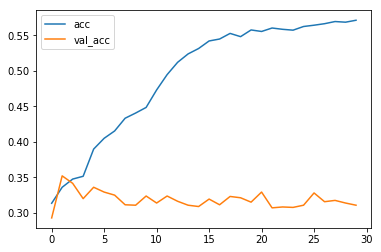

In [272]:
import matplotlib.pyplot as plt
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

In [268]:
preds=model.predict(data_test)

In [269]:
print(classification_report(Ytest.argmax(axis=1), preds.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.19      0.11      0.14       328
          1       0.35      0.49      0.41       574
          2       0.00      0.00      0.00       141
          3       0.00      0.00      0.00        89
          4       0.00      0.00      0.00        12
          5       0.29      0.38      0.33       480

avg / total       0.25      0.31      0.27      1624



/home/ItDev_Billy/.conda/envs/p35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [262]:
Ytest.shape

(1624, 6)

In [264]:
574/1624

0.35344827586206895